In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
user = pd.read_csv('rating.csv')
user.sample(10)

,user_id,anime_id,rating
5134311,49029,165,8
2956921,27468,27899,7
3248417,29993,4898,8
4644211,44444,7769,6
2969515,27565,849,8
2195050,21247,4382,7
1360194,12909,11703,8
982009,9091,9989,5
1017467,9641,1448,-1
507618,5144,997,6


In [4]:
print("Shape of anime dataset {}".format(anime.shape))

Shape of anime dataset (12294, 7)


In [5]:
print("Shape of user dataset {}".format(user.shape))

Shape of user dataset (7813737, 3)


In [6]:
user[user['user_id'] == 1].rating.mean()

-0.7124183006535948

In [7]:
user[user['user_id'] == 7].rating.mean()

7.387755102040816

In [8]:
Mean_Rate = user.groupby(['user_id']).mean().reset_index()
print(Mean_Rate.head(10))
print("Shape of this datset is {}".format(Mean_Rate.shape))

   user_id      anime_id    rating
0        1  12888.483660 -0.712418
1        2  13459.000000  2.666667
2        3  13352.744681  7.382979
3        4  10135.403846 -1.000000
4        5  11023.301927  4.263383
5        6   7752.135135 -1.000000
6        7  15824.320700  7.387755
7        8   8699.166667  8.333333
8        9   1887.000000  8.000000
9       10   8579.875000  2.875000
Shape of this datset is (73515, 3)


In [9]:
Mean_Rate['mean_rating'] = Mean_Rate['rating']
print(Mean_Rate.head())

   user_id      anime_id    rating  mean_rating
0        1  12888.483660 -0.712418    -0.712418
1        2  13459.000000  2.666667     2.666667
2        3  13352.744681  7.382979     7.382979
3        4  10135.403846 -1.000000    -1.000000
4        5  11023.301927  4.263383     4.263383


In [10]:
Mean_Rate.drop(['anime_id','rating'], axis=1,inplace=True)
print(Mean_Rate.head())

   user_id  mean_rating
0        1    -0.712418
1        2     2.666667
2        3     7.382979
3        4    -1.000000
4        5     4.263383


In [11]:
user = pd.merge(user, Mean_Rate, on=['user_id', 'user_id'])
print(user.head())

   user_id  anime_id  rating  mean_rating
0        1        20      -1    -0.712418
1        1        24      -1    -0.712418
2        1        79      -1    -0.712418
3        1       226      -1    -0.712418
4        1       241      -1    -0.712418


In [12]:
#If user rating is less then mean_rating we drop that column as we are looking which anime is liked by the user
user = user.drop(user[user.rating < user.mean_rating].index)

In [13]:
print(user[user['user_id'] == 1])

     user_id  anime_id  rating  mean_rating
47         1      8074      10    -0.712418
81         1     11617      10    -0.712418
83         1     11757      10    -0.712418
101        1     15451      10    -0.712418


In [14]:
print(user[user['user_id'] == 7])

      user_id  anime_id  rating  mean_rating
807         7        30      10     7.387755
808         7        31       9     7.387755
809         7        32       9     7.387755
811         7        64       8     7.387755
813         7       111       8     7.387755
...       ...       ...     ...          ...
1121        7     31149       8     7.387755
1130        7     31704       8     7.387755
1131        7     31716       8     7.387755
1140        7     32093       8     7.387755
1147        7     33091       8     7.387755

[164 rows x 4 columns]


In [15]:
print("Updated shape of the user is now {}".format(user.shape))

Updated shape of the user is now (4262566, 4)


In [16]:
unique_user = np.unique(user['user_id'])
print(unique_user)
print(len(unique_user))

[    1     2     3 ... 73514 73515 73516]
73515


In [17]:
user = user.rename({'rating':'userRating'}, axis='columns')
print(user.head())

     user_id  anime_id  userRating  mean_rating
47         1      8074          10    -0.712418
81         1     11617          10    -0.712418
83         1     11757          10    -0.712418
101        1     15451          10    -0.712418
153        2     11771          10     2.666667


In [18]:
mergedata = pd.merge(anime, user, on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
print(mergedata.head())

   anime_id            name                                 genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
3     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
4     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  rating  members  user_id  userRating  mean_rating  
0        1    9.37   200630      152          10     7.699301  
1        1    9.37   200630      244          10     8.729242  
2        1    9.37   200630      271          10     7.372287  
3        1    9.37   200630      322          10     8.356322  
4        1    9.37   200630      398          10    -0.832298  


In [19]:
unique_user = np.unique(mergedata['user_id'])
print(unique_user)
print(len(unique_user))

[    1     2     3 ... 19998 19999 20000]
20000


In [20]:
unique_anime = np.unique(mergedata['anime_id'])
print(unique_anime)
print(len(unique_anime))
unique_anime = np.unique(mergedata['name'])
print(unique_anime)
print(len(unique_anime))

[    1     5     6 ... 34325 34349 34475]
7852
['&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi'
 '&quot;Bungaku Shoujo&quot; Memoire' '&quot;Bungaku Shoujo&quot; Movie'
 ... 'xxxHOLiC Movie: Manatsu no Yoru no Yume' 'xxxHOLiC Rou'
 'xxxHOLiC Shunmuki']
7852


In [22]:
#Now we are going to create a crosstable of 'user_id' and 'name' using pandas.crosstab
#here we use 'user_id' as row or index and 'name' as column
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.sample(5)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
user_anime.shape

(20000, 7852)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(user_anime)
pca = pca.transform(user_anime)

In [25]:
ps = pd.DataFrame(pca)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415759
1,-1.773553,-0.272593,0.116390
2,0.218814,-1.232282,-0.985781
3,0.199435,-0.291005,0.681044
4,3.532125,-0.184796,-0.743305


In [28]:
#Cluster
tocluster = pd.DataFrame(ps[[0,1,2]])
tocluster.head()

,0,1,2
0,-1.579129,-0.500240,0.415759
1,-1.773553,-0.272593,0.116390
2,0.218814,-1.232282,-0.985781
3,0.199435,-0.291005,0.681044
4,3.532125,-0.184796,-0.743305


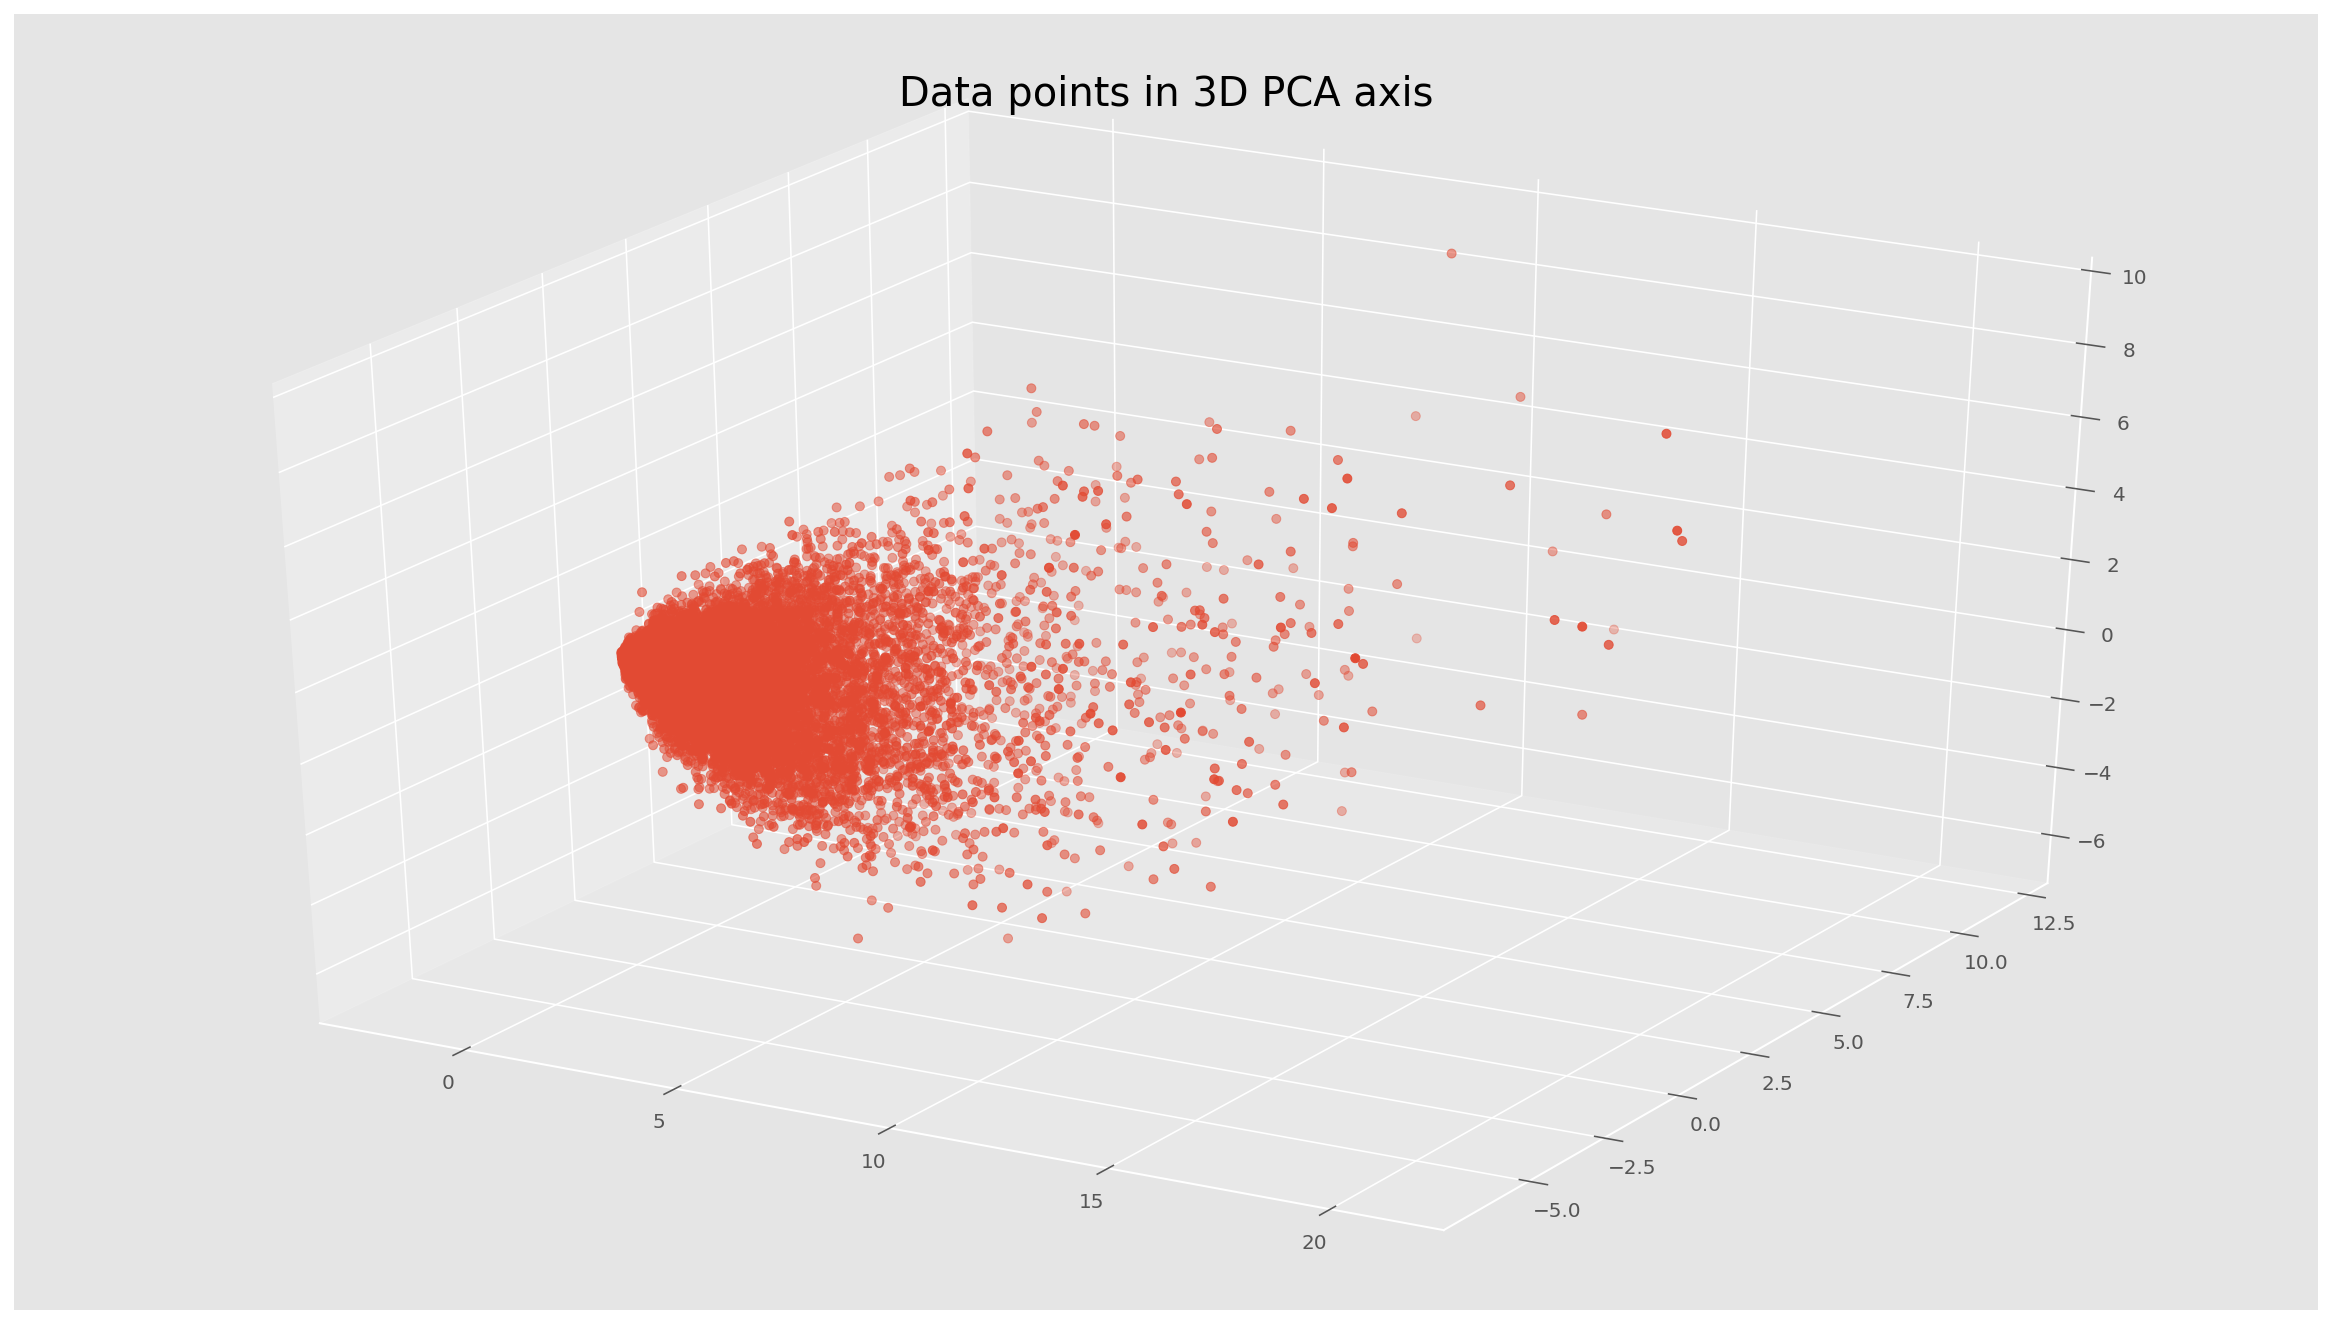

In [30]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[1], tocluster[2])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [31]:
from sklearn.cluster import KMeans

no_of_cluster = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in no_of_cluster]
print(kmeans)

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy

In [32]:
#Score of every no of cluster
score = [kmeans[i].fit(tocluster).score(tocluster) for i in range(len(kmeans))]
print(score)

[-85915.22832668459, -69012.92718037235, -55587.81903591507, -48546.16705650718, -43142.18162903335, -38334.81353260562, -35144.88282128958, -32709.00936553289]


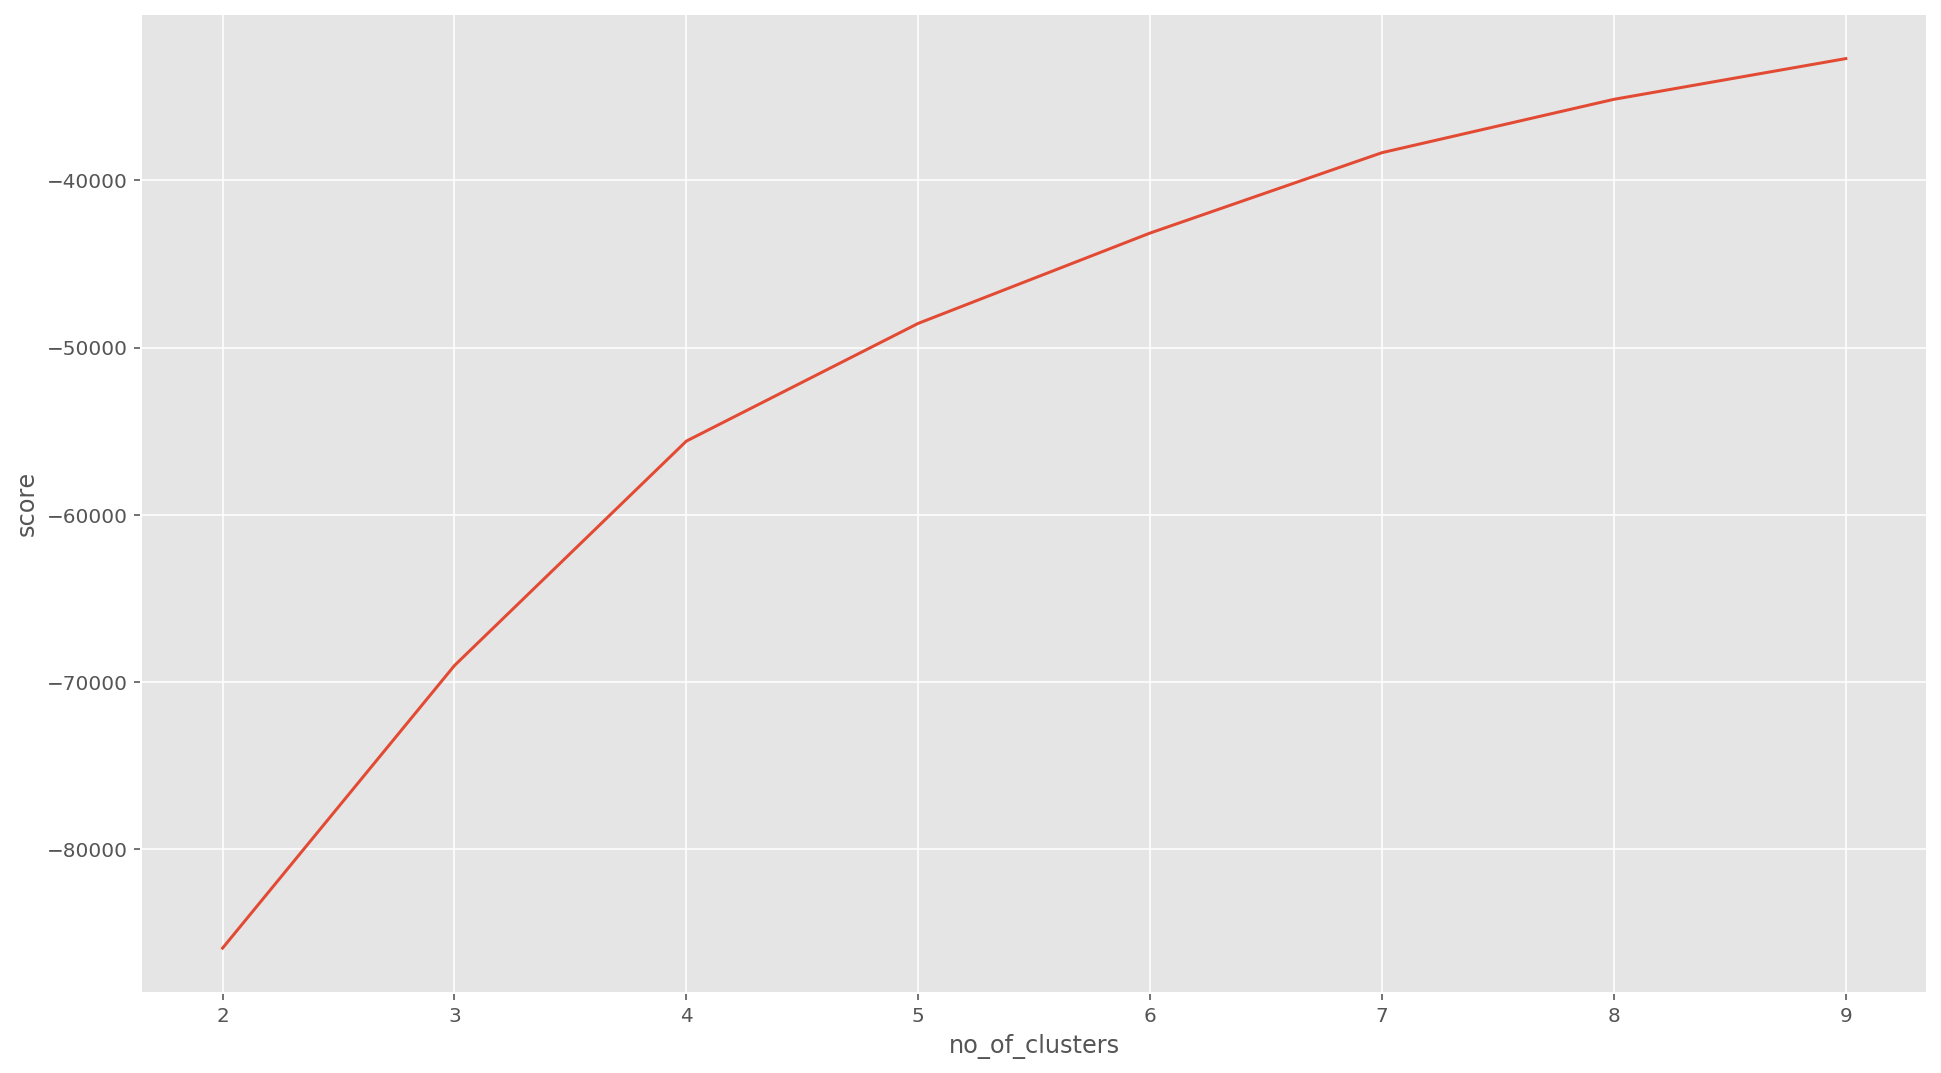

In [33]:
plt.plot(no_of_cluster, score)
plt.xlabel('no_of_clusters')
plt.ylabel('score')
plt.show()

In [37]:
#Silhouette score
from sklearn.metrics import silhouette_score
score = []
inertia_list = np.empty(10)

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    score.append(silhouette_score(tocluster, kmeans.labels_))

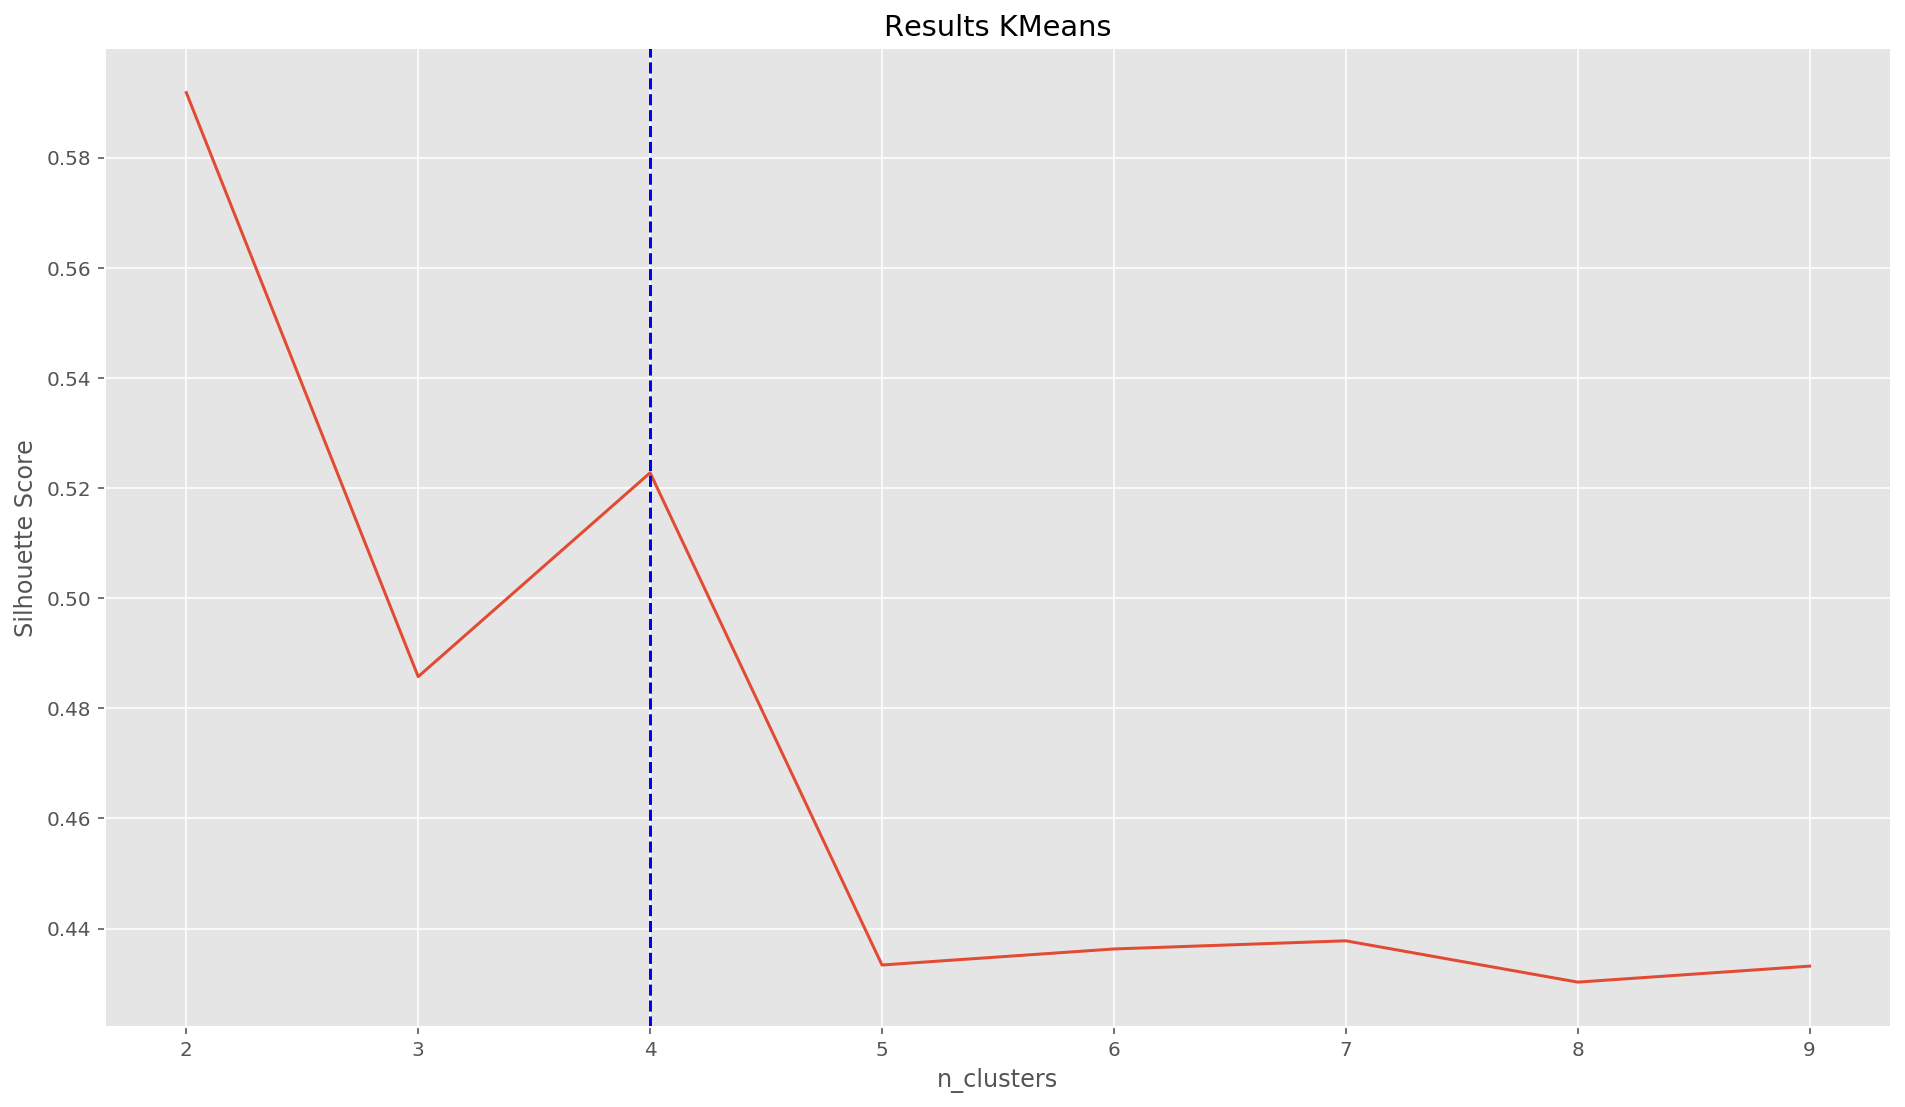

In [39]:
plt.plot(range(2,10), score);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [46]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 4, random_state=35).fit(tocluster)
centers = cluster.cluster_centers_
c_preds = cluster.predict(tocluster)

print(centers)

[[-1.0900261  -0.040269    0.0670218 ]
 [ 1.97216153 -1.12359114 -0.43737145]
 [ 7.59630555 -0.64140468  0.83696153]
 [ 1.67302229  2.31535247 -0.0233453 ]]


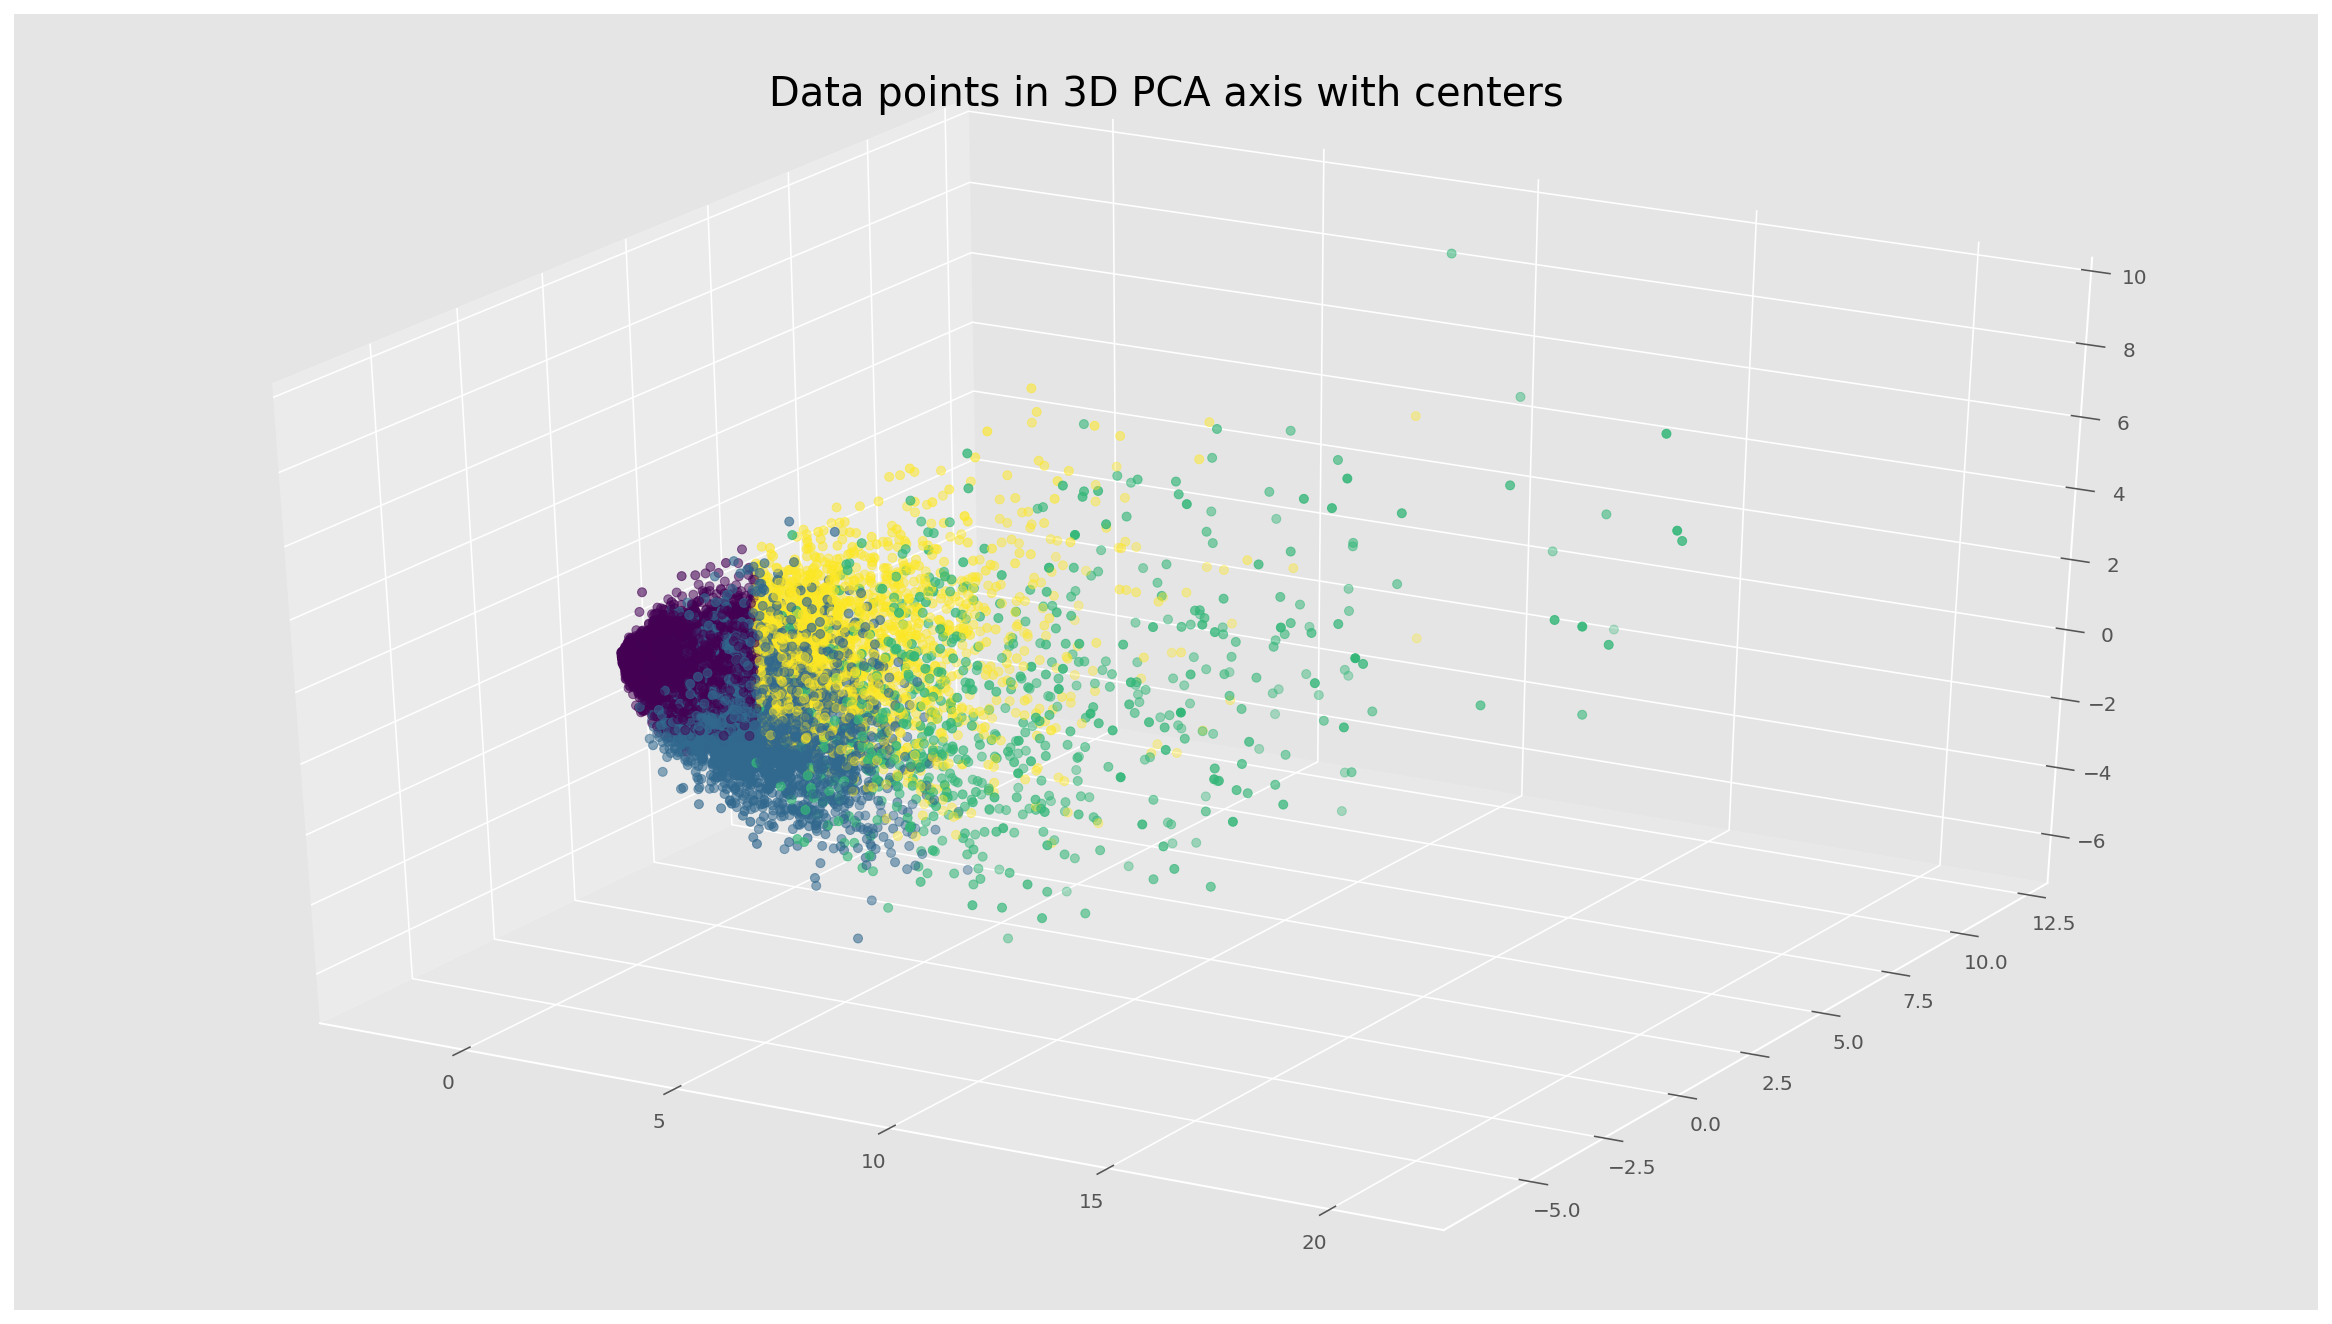

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[1], tocluster[2], c=c_preds)

plt.title('Data points in 3D PCA axis with centers', fontsize=20)
plt.show()